In [ ]:
#%matplotlib notebook

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Read file with plotting information
plot_data_csv = "../Output/Data_for_plotting.csv"

# Read data into Pandas data frames
plot_data_df = pd.read_csv(plot_data_csv)

In [86]:
# Add Totals for migrants
plot_data_df["Tot Migrant"] = plot_data_df.iloc[:,3:7].sum(axis=1)

# Add Totals for Indicators
plot_data_df["Tot Indic"] = plot_data_df.iloc[:,8:12].sum(axis=1)
plot_data_df

,Origin,Dev Level,Income Range,2005_x,2010_x,2015_x,2017_x,Indicator,2005_y,2010_y,2015_y,2017_y,Tot Migrant,Tot Indic
0,Afghanistan,Least developed,Low-income,3826255,4989209,4855376,4826464,"Personal remittances, received (current US$)",0.000000e+00,3.462515e+08,3.486247e+08,7.343102e+08,18497304,1.429186e+09
1,Afghanistan,Least developed,Low-income,3826255,4989209,4855376,4826464,GDP (current US$),6.209140e+09,1.585657e+10,1.990711e+10,2.019176e+10,18497304,6.216459e+10
2,Bangladesh,Least developed,Lower-middle-income,5765158,6742845,7246726,7499919,"Personal remittances, received (current US$)",4.642385e+09,1.085021e+10,1.529554e+10,1.349823e+10,27254648,4.428637e+10
3,Bangladesh,Least developed,Lower-middle-income,5765158,6742845,7246726,7499919,GDP (current US$),6.944294e+10,1.150000e+11,1.950000e+11,2.500000e+11,27254648,6.294429e+11
4,China,Less Developed,Upper-middle-income,7242306,8648435,9674720,9961559,"Personal remittances, received (current US$)",3.337062e+09,1.363604e+10,4.444530e+10,2.867598e+10,35527020,9.009438e+10
5,China,Less Developed,Upper-middle-income,7242306,8648435,9674720,9961559,GDP (current US$),2.290000e+12,6.090000e+12,1.100000e+13,1.210000e+13,35527020,3.148000e+13
6,Germany,More Developed,High-income,3585342,3849980,4032528,4207957,"Personal remittances, received (current US$)",6.865779e+09,1.279163e+10,1.557094e+10,1.668903e+10,15675807,5.191738e+10
7,Germany,More Developed,High-income,3585342,3849980,4032528,4207957,GDP (current US$),2.860000e+12,3.420000e+12,3.380000e+12,3.690000e+12,15675807,1.335000e+13
8,India,Less Developed,Lower-middle-income,9649626,13320745,15859419,16587070,"Personal remittances, received (current US$)",2.212509e+10,5.347996e+10,6.890969e+10,6.896718e+10,55416860,2.134819e+11
9,India,Less Developed,Lower-middle-income,9649626,13320745,15859419,16587070,GDP (current US$),8.200000e+11,1.680000e+12,2.100000e+12,2.650000e+12,55416860,7.250000e+12


In [ ]:
ytick = np.arange(220000000000,32620000000000,6480000000000)

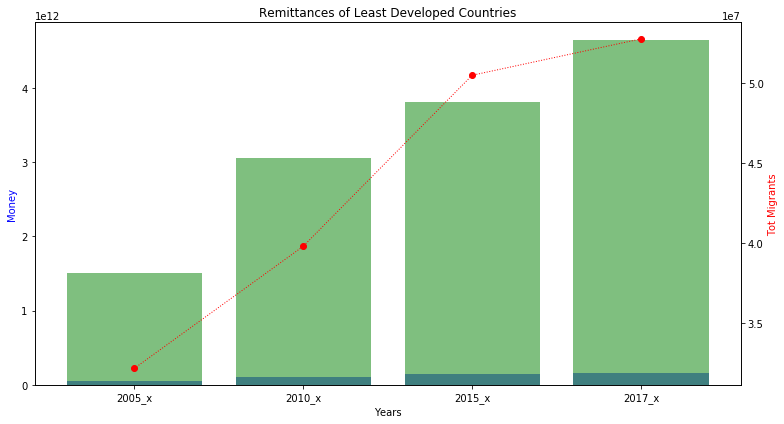

In [89]:
# personal remittances and number of migrants for Least developed contries for timed series
x_axis = plot_data_df.columns[3:7]
y_axis = plot_data_df.loc[(plot_data_df["Indicator"] == "Personal remittances, received (current US$)") &
                          (plot_data_df["Income Range"] == "Lower-middle-income")].iloc[:,8:12].sum()
y2_axis = plot_data_df.loc[(plot_data_df["Indicator"] == "GDP (current US$)") &
                          (plot_data_df["Income Range"] == "Lower-middle-income")].iloc[:,8:12].sum()
my_axis = plot_data_df.loc[(plot_data_df["Indicator"] == "GDP (current US$)") &
                          (plot_data_df["Income Range"] == "Lower-middle-income")].iloc[:,3:7].sum()

# #fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(11,6), sharex=True)
fig, ax1 = plt.subplots(figsize=(11,6))

ax3 = ax1.twinx()
ax1.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
ax1.bar(x_axis, y2_axis, color='g', alpha=0.5, align="center")
ax3.plot(x_axis, my_axis, linestyle=':', linewidth=1, marker="o", color="red")

ax1.set_xlabel('Years')
ax1.set_ylabel('Money', color='b')
ax3.set_ylabel('Tot Migrants', color='r')

# # # Example line or bar
# # plt.figure(figsize=(13,6))
# # plt.plot(x_axis, y_axis, linestyle=':', linewidth=1, marker="o", color="red", secondary_y=True)
# # plt.bar(x_axis, y2_axis, color='r', alpha=0.5, align="center")

plt.title("Remittances of Least Developed Countries")

plt.tight_layout()
plt.show()

# We might need to add % of GDP value as a label to give a more accurate view and add the 
# number of migrants in each plot point

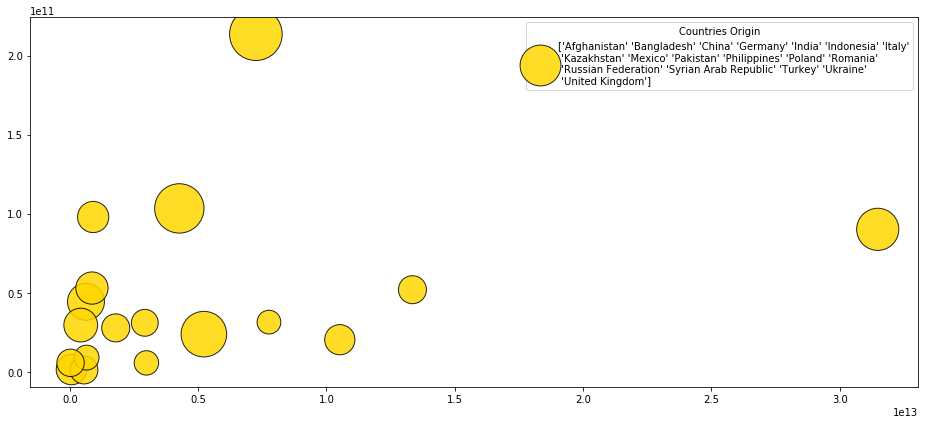

In [83]:
# data for bubble
x_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Indic"]
y_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Tot Indic"]
z_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Migrant"]
labels = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Origin"]

# Example bubble
plt.figure(figsize=(13,6))
rur_hdl = plt.scatter(x_axis,y_axis, s=z_axis/20000, alpha=0.85, \
                      facecolor="Gold", edgecolors="black", marker="o", color="yellow", linewidths=1, label=labels.values)
leg_hdl = plt.legend(handles=[rur_hdl], loc="best", title="Countries Origin")
plt.tight_layout()
plt.show()

In [ ]:
# y_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Tot Indic"]
# y2_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"].iloc[:,3:7]

# xGDP_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Origin"]
# yGDP_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Indic"]


In [ ]:
ytick = np.arange(220000000000,32620000000000,6480000000000)